<a href="https://colab.research.google.com/github/knagaev/HackerRank/blob/main/Kostin_HW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Задачи на методы одномерной минимизации и методы нулевого порядка

## Задача 1 (3 pts)

В конспекте можно найти псевдокод для метода золотого сечения, а также метод Фибоначчи описан в статье [тут](https://neerc.ifmo.ru/wiki/index.php?title=%D0%9C%D0%B5%D1%82%D0%BE%D0%B4_%D0%A4%D0%B8%D0%B1%D0%BE%D0%BD%D0%B0%D1%87%D1%87%D0%B8#:~:text=%D0%9C%D0%B5%D1%82%D0%BE%D0%B4%20%D0%A4%D0%B8%D0%B1%D0%BE%D0%BD%D0%B0%D1%87%D1%87%D0%B8%5B%D0%BF%D1%80%D0%B0%D0%B2%D0%B8%D1%82%D1%8C%5D,%D0%BA%D0%B0%D0%B6%D0%B4%D0%BE%D0%B9%20%D0%BF%D0%BE%D1%81%D0%BB%D0%B5%D0%B4%D1%83%D1%8E%D1%89%D0%B5%D0%B9%20%D1%82%D0%BE%D0%BB%D1%8C%D0%BA%D0%BE%20%D0%BF%D0%BE%20%D0%BE%D0%B4%D0%BD%D0%BE%D0%BC%D1%83.).
Ваша задача реализовать эти два метода и протестировать их сходимость по времени и по итерациям для функции

$$ f(x) = -\frac{1}{(x-1)^2} \left( \log x - 2 \frac{x-1}{x+1} \right) $$

на отрезке $[1.2, 5]$.

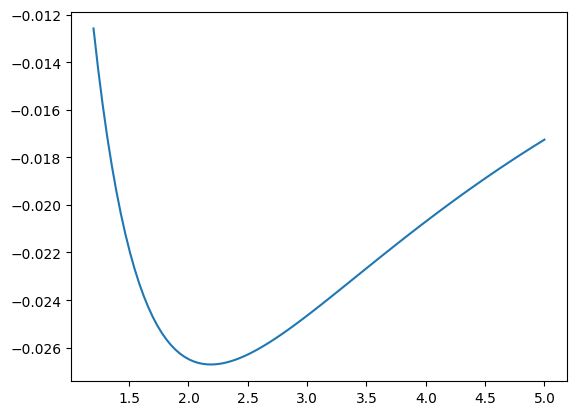

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def func(x):
  return -1./(x-1)**2 * (np.log(x) - 2 * (x - 1) / (x+1))

x = np.linspace(1.2, 5, num=100)
y = func(x)
plt.plot(x, y)

In [ ]:
import time

def golden(f, a, b, tol=1e-6, max_iter=100):
    golden_ratio = (np.sqrt(5) - 1) / 2

    y = a + (1 - golden_ratio) * (b - a)
    z = a + golden_ratio * (b - a)
    f_y = f(y)
    f_z = f(z)

    iters = 0
    stack = []

    while abs(b - a) > tol and iters < max_iter:
        iters += 1
        stack.append((a, b))
        if f_y <= f_z:
            b = z
            z = y
            f_z = f_y
            y = a + (1 - golden_ratio) * (b - a)
            f_y = f(y)
        else:
            a = y
            y = z
            f_y = f_z
            z = a + golden_ratio * (b - a)
            f_z = f(z)

    x_min = (a + b) / 2
    return x_min, f(x_min), iters, stack

def fibo(f, a, b, tol=1e-6, max_iter=100):
    fib = [1, 1]
    while fib[-1] < (b - a) / tol:
        fib.append(fib[-1] + fib[-2])

    n = len(fib) - 1
    if n > max_iter: n = max_iter

    y = a + (fib[n-2] / fib[n]) * (b - a)
    z = a + (fib[n-1] / fib[n]) * (b - a)
    f_y = f(y)
    f_z = f(z)

    iters = 0
    stack = []

    for k in range(1, n):
        iters += 1
        stack.append((a, b))
        if f_y <= f_z:
            b = z
            z = y
            f_z = f_y
            y = a + (fib[n-k-1] / fib[n-k+1]) * (b - a)
            f_y = f(y)
        else:
            a = y
            y = z
            f_y = f_z
            z = a + (fib[n-k] / fib[n-k+1]) * (b - a)
            f_z = f(z)

    x_min = (a + b) / 2
    return x_min, f(x_min), iters, stack

# Запускаем функции и выводим результат
a, b = 1.2, 5.0
start_time = time.time()
x_min_gs, f_min_gs, iter_gs, stack_gs = golden(func, a, b)
time_gs = time.time() - start_time

start_time = time.time()
x_min_fib, f_min_fib, iter_fib, stack_fib = fibo(func, a, b)
time_fib = time.time() - start_time

print("\nМетод золотого сечения:")
print(f"Минимум: x = {x_min_gs}, f(x) = {f_min_gs}")
print(f"Итерации: {iter_gs}, Время: {time_gs:.6f} сек")

print("\nМетод Фибоначчи:")
print(f"Минимум: x = {x_min_fib}, f(x) = {f_min_fib}")
print(f"Итерации: {iter_fib}, Время: {time_fib:.6f} сек")


Метод золотого сечения:
Минимум: x = 2.1887047217473206, f(x) = -0.02670719022307065
Итерации: 32, Время: 0.000331 сек

Метод Фибоначчи:
Минимум: x = 2.1887046550704516, f(x) = -0.0267071902230706
Итерации: 32, Время: 0.000306 сек


## Задача 2 (5 pts)

Для функций, область определения которых является подмножеством пространства размерности больше 1, применение таких простых методов становится затруднительным, так как означает экспоненциальную сложность по размерности задачи.
Поэтому для решения таких задач были предложены другие методы нулевого порядка, то есть безградиентные.

Для простоты сравните метод Нелдера-Мида из пакета [scipy.optimize](https://docs.scipy.org/doc/scipy/reference/optimize.minimize-neldermead.html) и стандартный метод из библиотеки [zoopt](https://zoopt.readthedocs.io/en/latest/index.html) по времени работы и по итерациям необходимым до сходимости к заданной точности.

Тестовая задача:

$$ \min_{x \in \mathbb{R}^n} 5 n + \sum_{i=1}^n [x_i^2 - 5\cos 2\pi x_i]$$

- $n=2$
- $n=5$
- $n=20$

In [ ]:
!pip install zoopt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.3/55.3 kB 2.1 MB/s eta 0:00:00


In [ ]:
from scipy.optimize import minimize
from zoopt import Dimension, Objective, Parameter, Opt

def func(x):
    n = len(x)
    return 5 * n + sum([xi**2 - 5 * np.cos(2 * np.pi * xi) for xi in x])

# Для zoopt исправление формата - массив из солвера
def zoopt_func(solution):
    x = solution.get_x()
    return func(x)

dimensions = [2, 5, 20]
results = {}

for n in dimensions:
    print(f"\nРазмерность: {n}")

    # Нелдер-Мид
    x0 = np.ones(n)
    start_time = time.time()
    result_nm = minimize(func, x0, method='Nelder-Mead', options={'disp': False, 'maxiter': 10000})
    time_nm = time.time() - start_time

    # zoopt
    zoopt_success = False
    zoopt_value = float('inf')
    zoopt_time = 0

    dim = Dimension(n, [[-10, 10]] * n, [True] * n)
    objective = Objective(zoopt_func, dim)
    start_time = time.time()
    parameter = Parameter(budget=5000, intermediate_result=False)
    solution = Opt.min(objective, parameter)
    zoopt_time = time.time() - start_time
    zoopt_value = solution.get_value()

    print(f"Нелдер-Мид: f(x) = {result_nm.fun:.6f}, время: {time_nm:.4f} сек, итераций: {result_nm.nit}")
    print(f"zoopt: f(x) = {zoopt_value:.6f}, время: {zoopt_time:.4f} сек, итераций: 5000")


Размерность: 2
[zoopt] x: [-0.004839363972292787, 1.1315067830393411e-06]
[zoopt] value: np.float64(0.0023346479319421576)
Нелдер-Мид: f(x) = 1.979933, время: 0.0090 сек, итераций: 23
zoopt: f(x) = 0.002335, время: 0.8298 сек, итераций: 5000

Размерность: 5
[zoopt] x: [-0.0018638548270798762, 0.0025142343415467394, -0.0003397105970234545, 0.0020085173715402773, -0.015091223850406656]
[zoopt] value: np.float64(0.024078669626948823)
Нелдер-Мид: f(x) = 4.949831, время: 0.0047 сек, итераций: 70
zoopt: f(x) = 0.024079, время: 0.8222 сек, итераций: 5000

Размерность: 20
[zoopt] x: [0.053264813013386814, -0.04571786429393043, -0.019990757691994432, -0.04786784129766364, 0.03941622872161332, 0.014305571519660276, 0.018998482093049773, 0.012818702321830244, 0.06462740305095416, 0.057031325095864165, -0.0233647762363951, -0.04353561264403005, -0.9204312410165922, 0.9577828406532447, -0.02993121692771794, -0.05823294639330001, -0.05846541312387288, -0.021979808144676483, -1.0312739635435477, 0.0


Размерность: 2
[zoopt] [break loop] because distinct_flag is false too much times
[zoopt] x: [3.7951633842467956e-07, -4.925996667012959e-06]
[zoopt] value: np.float64(2.4335271575637307e-09)
[zoopt] The best solution is:
[zoopt] x: [3.7951633842467956e-07, -4.925996667012959e-06]
[zoopt] value: np.float64(2.4335271575637307e-09)


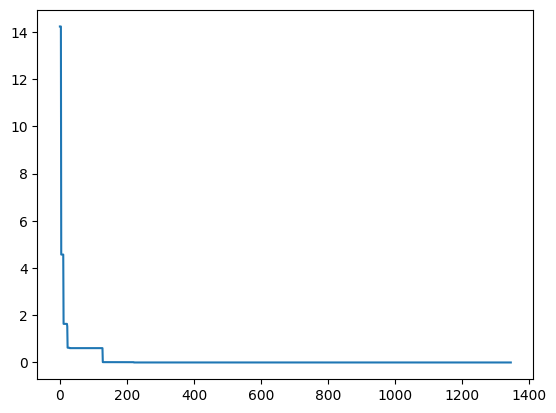

[zoopt] Best 1 result: 2.4335271575637307e-09 +- 0.0

Размерность: 5
[zoopt] [break loop] because distinct_flag is false too much times
[zoopt] x: [0.0021831024024563743, -1.9703821596496116e-06, 0.0016416586369314423, 0.0003435099322913186, 0.0003489161201882797]
[zoopt] value: np.float64(0.0007677220352597658)
[zoopt] The best solution is:
[zoopt] x: [0.0021831024024563743, -1.9703821596496116e-06, 0.0016416586369314423, 0.0003435099322913186, 0.0003489161201882797]
[zoopt] value: np.float64(0.0007677220352597658)


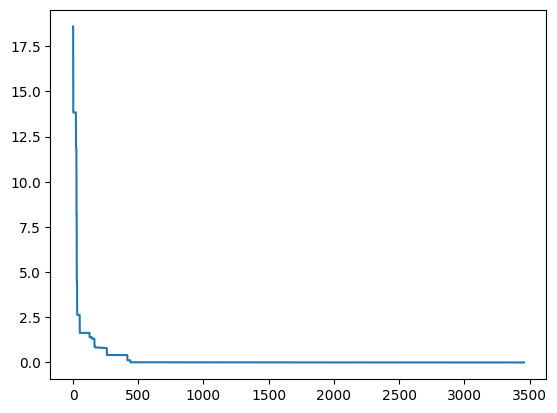

[zoopt] Best 1 result: 0.0007677220352597658 +- 0.0

Размерность: 20
[zoopt] expected remaining running time: 00:00:06
[zoopt] x: [0.0001001227835124574, 0.004792785801401633, 0.0007789176162782407, 0.001018023043262317, -0.00047819023948503236, 0.0011139054502713464, 0.0006358682676810279, 0.0014890848426478698, 0.0005669409980106899, 0.00040168522224088036, -0.0007256407867814029, -0.00023442194455447485, 0.00147879294777864, 0.0006563643417523135, 0.0034949288664158917, -0.002015182043454633, 8.076260953338021e-05, -0.0017619291649757507, 0.00406298993401677, 0.002952580055771703]
[zoopt] value: np.float64(0.0076771469572349815)
[zoopt] The best solution is:
[zoopt] x: [0.0001001227835124574, 0.004792785801401633, 0.0007789176162782407, 0.001018023043262317, -0.00047819023948503236, 0.0011139054502713464, 0.0006358682676810279, 0.0014890848426478698, 0.0005669409980106899, 0.00040168522224088036, -0.0007256407867814029, -0.00023442194455447485, 0.00147879294777864, 0.000656364341752

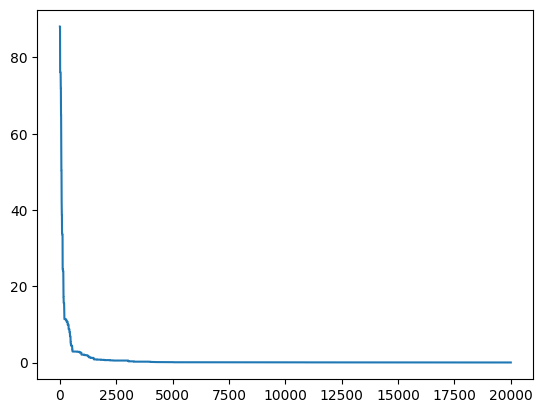

[zoopt] Best 1 result: 0.0076771469572349815 +- 0.0


In [ ]:
from zoopt import Dimension, ValueType, Dimension2, Objective, Parameter, ExpOpt

def z_func(solution):
    x = solution.get_x()
    return 5 * len(x) + sum([xi**2 - 5 * np.cos(2 * np.pi * xi) for xi in x])

dimensions = [2, 5, 20]
results = {}

for dim_size in dimensions:
    print(f"\nРазмерность: {dim_size}")
    # zoopt
    '''
    zoopt_success = False
    zoopt_value = float('inf')
    zoopt_time = 0

    dim = Dimension(n, [[-10, 10]] * n, [True] * n)
    objective = Objective(zoopt_func, dim)
    start_time = time.time()
    parameter = Parameter(budget=5000, intermediate_result=False)
    solution = Opt.min(objective, parameter)
    zoopt_time = time.time() - start_time
    zoopt_value = solution.get_value()

    print(f"Нелдер-Мид: f(x) = {result_nm.fun:.6f}, время: {time_nm:.4f} сек, итераций: {result_nm.nit}")
    print(f"zoopt: f(x) = {zoopt_value:.6f}, время: {zoopt_time:.4f} сек, итераций: 5000")
    '''

    dim_regs = [[-1, 1]] * dim_size  # dimension range
    dim_tys = [True] * dim_size  # dimension type : real
    dim = Dimension(dim_size, dim_regs, dim_tys)  # form up the dimension object
    # dim = Dimension2([(ValueType.CONTINUOUS, [-1, 1], 1e-6)]*dim_size)
    objective = Objective(z_func, dim)  # form up the objective function

    # setup al gorithm parameters
    #budget = 20000  # number of calls to the objective function
    #parameter = Parameter(budget=budget, high_dim_handling=True, reducedim=True, num_sre=5, low_dimension=Dimension(10, [[-1, 1]] * 10, [True] * 10))
    budget = 1000 * dim_size  # number of calls to the objective function
    parameter = Parameter(budget=budget, precision= 1e-6)
    #parameter = Parameter(precision=1e-6)


    #solution_list = ExpOpt.min(objective, parameter, repeat=1, plot=True)
    #print(solution_list)
    solution_list = ExpOpt.min(objective, parameter, repeat=1, plot=True)

In [ ]:
import numpy as np
from scipy.optimize import minimize

def func(x):
    return 5 * x.shape[0] + sum([xi**2 - 5 * np.cos(2 * np.pi * xi) for xi in x])

dimensions = [2, 5, 20]

for dim_size in dimensions:
    print(f"\nРазмерность: {dim_size}")

    x0 = np.ones(dim_size) / 2.
    print(x0)
    res = minimize(func, x0, method='nelder-mead',
               options={'fatol': 1e-6, 'disp': True, 'maxiter': 1e5})
    print(res)


Размерность: 2
[0.5 0.5]
Optimization terminated successfully.
         Current function value: 1.979933
         Iterations: 40
         Function evaluations: 75
       message: Optimization terminated successfully.
       success: True
        status: 0
           fun: 1.979932528550279
             x: [ 9.900e-01  9.899e-01]
           nit: 40
          nfev: 75
 final_simplex: (array([[ 9.900e-01,  9.899e-01],
                       [ 9.899e-01,  9.900e-01],
                       [ 9.900e-01,  9.900e-01]]), array([ 1.980e+00,  1.980e+00,  1.980e+00]))

Размерность: 5
[0.5 0.5 0.5 0.5 0.5]
Optimization terminated successfully.
         Current function value: 1.979933
         Iterations: 259
         Function evaluations: 418
       message: Optimization terminated successfully.
       success: True
        status: 0
           fun: 1.979932841284839
             x: [ 9.900e-01  1.218e-05  9.900e-01 -3.967e-05  3.950e-06]
           nit: 259
          nfev: 418
 final_simplex: (a